In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
import os

/home/erikh/GNN_test/gnn-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
design = pd.read_csv('../data/design_matrix_group_de.tsv', sep="\t")
samples = design['sample'].tolist()
ys = {}
for sample in samples:
    ys[sample] = design[design['sample'] == sample]['group'].values[0]-1
ys

{'TM_M2012_010': 0,
 'TM_M2012_011': 0,
 'TM_M2012_012': 0,
 'TM_M2012_013': 0,
 'TM_M2012_014': 0,
 'TM_M2012_016': 0,
 'TM_M2012_017': 0,
 'TM_M2012_018': 0,
 'TM_M2012_019': 0,
 'TM_M2012_020': 0,
 'TM_M2012_024': 0,
 'TM_M2012_025': 0,
 'TM_M2012_027': 0,
 'TM_M2012_028': 0,
 'TM_M2012_030': 0,
 'TM_M2012_031': 0,
 'TM_M2012_032': 0,
 'TM_M2012_033': 0,
 'TM_M2012_034': 0,
 'TM_M2012_038': 0,
 'TM_M2012_039': 0,
 'TM_M2012_040': 0,
 'TM_M2012_041': 0,
 'TM_M2012_042': 0,
 'TM_M2012_044': 0,
 'TM_M2012_045': 0,
 'TM_M2012_046': 0,
 'TM_M2012_047': 1,
 'TM_M2012_048': 1,
 'TM_M2012_050': 1,
 'TM_M2012_051': 1,
 'TM_M2012_052': 1,
 'TM_M2012_053': 1,
 'TM_M2012_054': 1,
 'TM_M2012_058': 0,
 'TM_M2012_059': 0,
 'TM_M2012_060': 0,
 'TM_M2012_061': 0,
 'TM_M2012_062': 0,
 'TM_M2012_064': 0,
 'TM_M2012_065': 0,
 'TM_M2012_066': 1,
 'TM_M2012_067': 1,
 'TM_M2012_068': 1,
 'TM_M2012_072': 1,
 'TM_M2012_073': 1,
 'TM_M2012_074': 1,
 'TM_M2012_075': 1,
 'TM_M2012_076': 1,
 'TM_M2012_078': 1,


In [3]:
graphfiles = [f for f in os.listdir('../data/graphs/')]
edgelists = {}
for f in graphfiles:
    edgelist = pd.read_csv(f'../data/graphs/{f}')
    edgelist.set_index(['child','parent'], inplace=True)
    scaled_features = StandardScaler(with_mean=False).fit_transform(edgelist.values)
    edgelist = pd.DataFrame(scaled_features, index=edgelist.index, columns=edgelist.columns)
    edgelist.reset_index(inplace=True)
    edgelists[f.split('.')[0]] = edgelist


In [4]:
graphs = {}

for sample in edgelists.keys():
    edgelist = edgelists[sample]
    G = nx.from_pandas_edgelist(df= edgelist, source='child', target='parent')
    for node in G.nodes():
        row = edgelist[edgelist['child'] == node]
        if len(row) != 0:
            weight = row['abundance'].values.tolist()[0]
            G.nodes()[node]['weight'] = weight
        else:  G.nodes()[node]['weight'] = 0
    graphs[sample] = G

print(graphs)

{'TM_M2012_106': <networkx.classes.graph.Graph object at 0x7f04ff3cd880>, 'TM_M2012_152': <networkx.classes.graph.Graph object at 0x7f04ff3ece80>, 'TM_M2012_189': <networkx.classes.graph.Graph object at 0x7f04ff3ec580>, 'TM_M2012_065': <networkx.classes.graph.Graph object at 0x7f04ff3ec220>, 'TM_M2012_170': <networkx.classes.graph.Graph object at 0x7f04ff3ec370>, 'TM_M2012_127': <networkx.classes.graph.Graph object at 0x7f04ff3ec6d0>, 'TM_M2012_121': <networkx.classes.graph.Graph object at 0x7f04ff3ec640>, 'TM_M2012_162': <networkx.classes.graph.Graph object at 0x7f05010846d0>, 'TM_M2012_154': <networkx.classes.graph.Graph object at 0x7f0501084af0>, 'TM_M2012_092': <networkx.classes.graph.Graph object at 0x7f0501084d90>, 'TM_M2012_190': <networkx.classes.graph.Graph object at 0x7f05010849d0>, 'TM_M2012_033': <networkx.classes.graph.Graph object at 0x7f05b863ac70>, 'TM_M2012_032': <networkx.classes.graph.Graph object at 0x7f0501084f40>, 'TM_M2012_078': <networkx.classes.graph.Graph obje

(array([ 1., 10., 41., 40., 25., 11.,  3.,  1.,  3.,  6.]),
 array([ 984., 1088., 1192., 1296., 1400., 1504., 1608., 1712., 1816.,
        1920., 2024.]),
 <BarContainer object of 10 artists>)

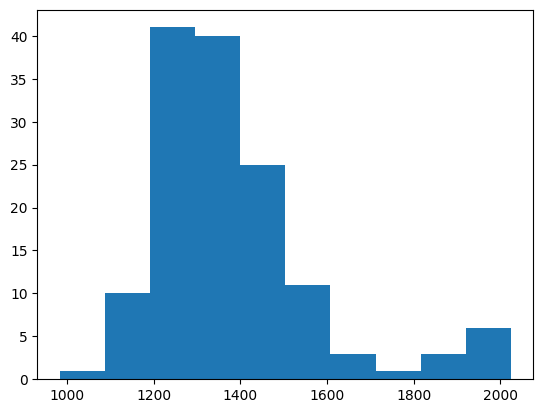

In [5]:
import matplotlib.pyplot as plt
nr_nodes=[]
for graph in graphs.values():
    nr_nodes.append(nx.number_of_nodes(graph))
plt.hist(nr_nodes)

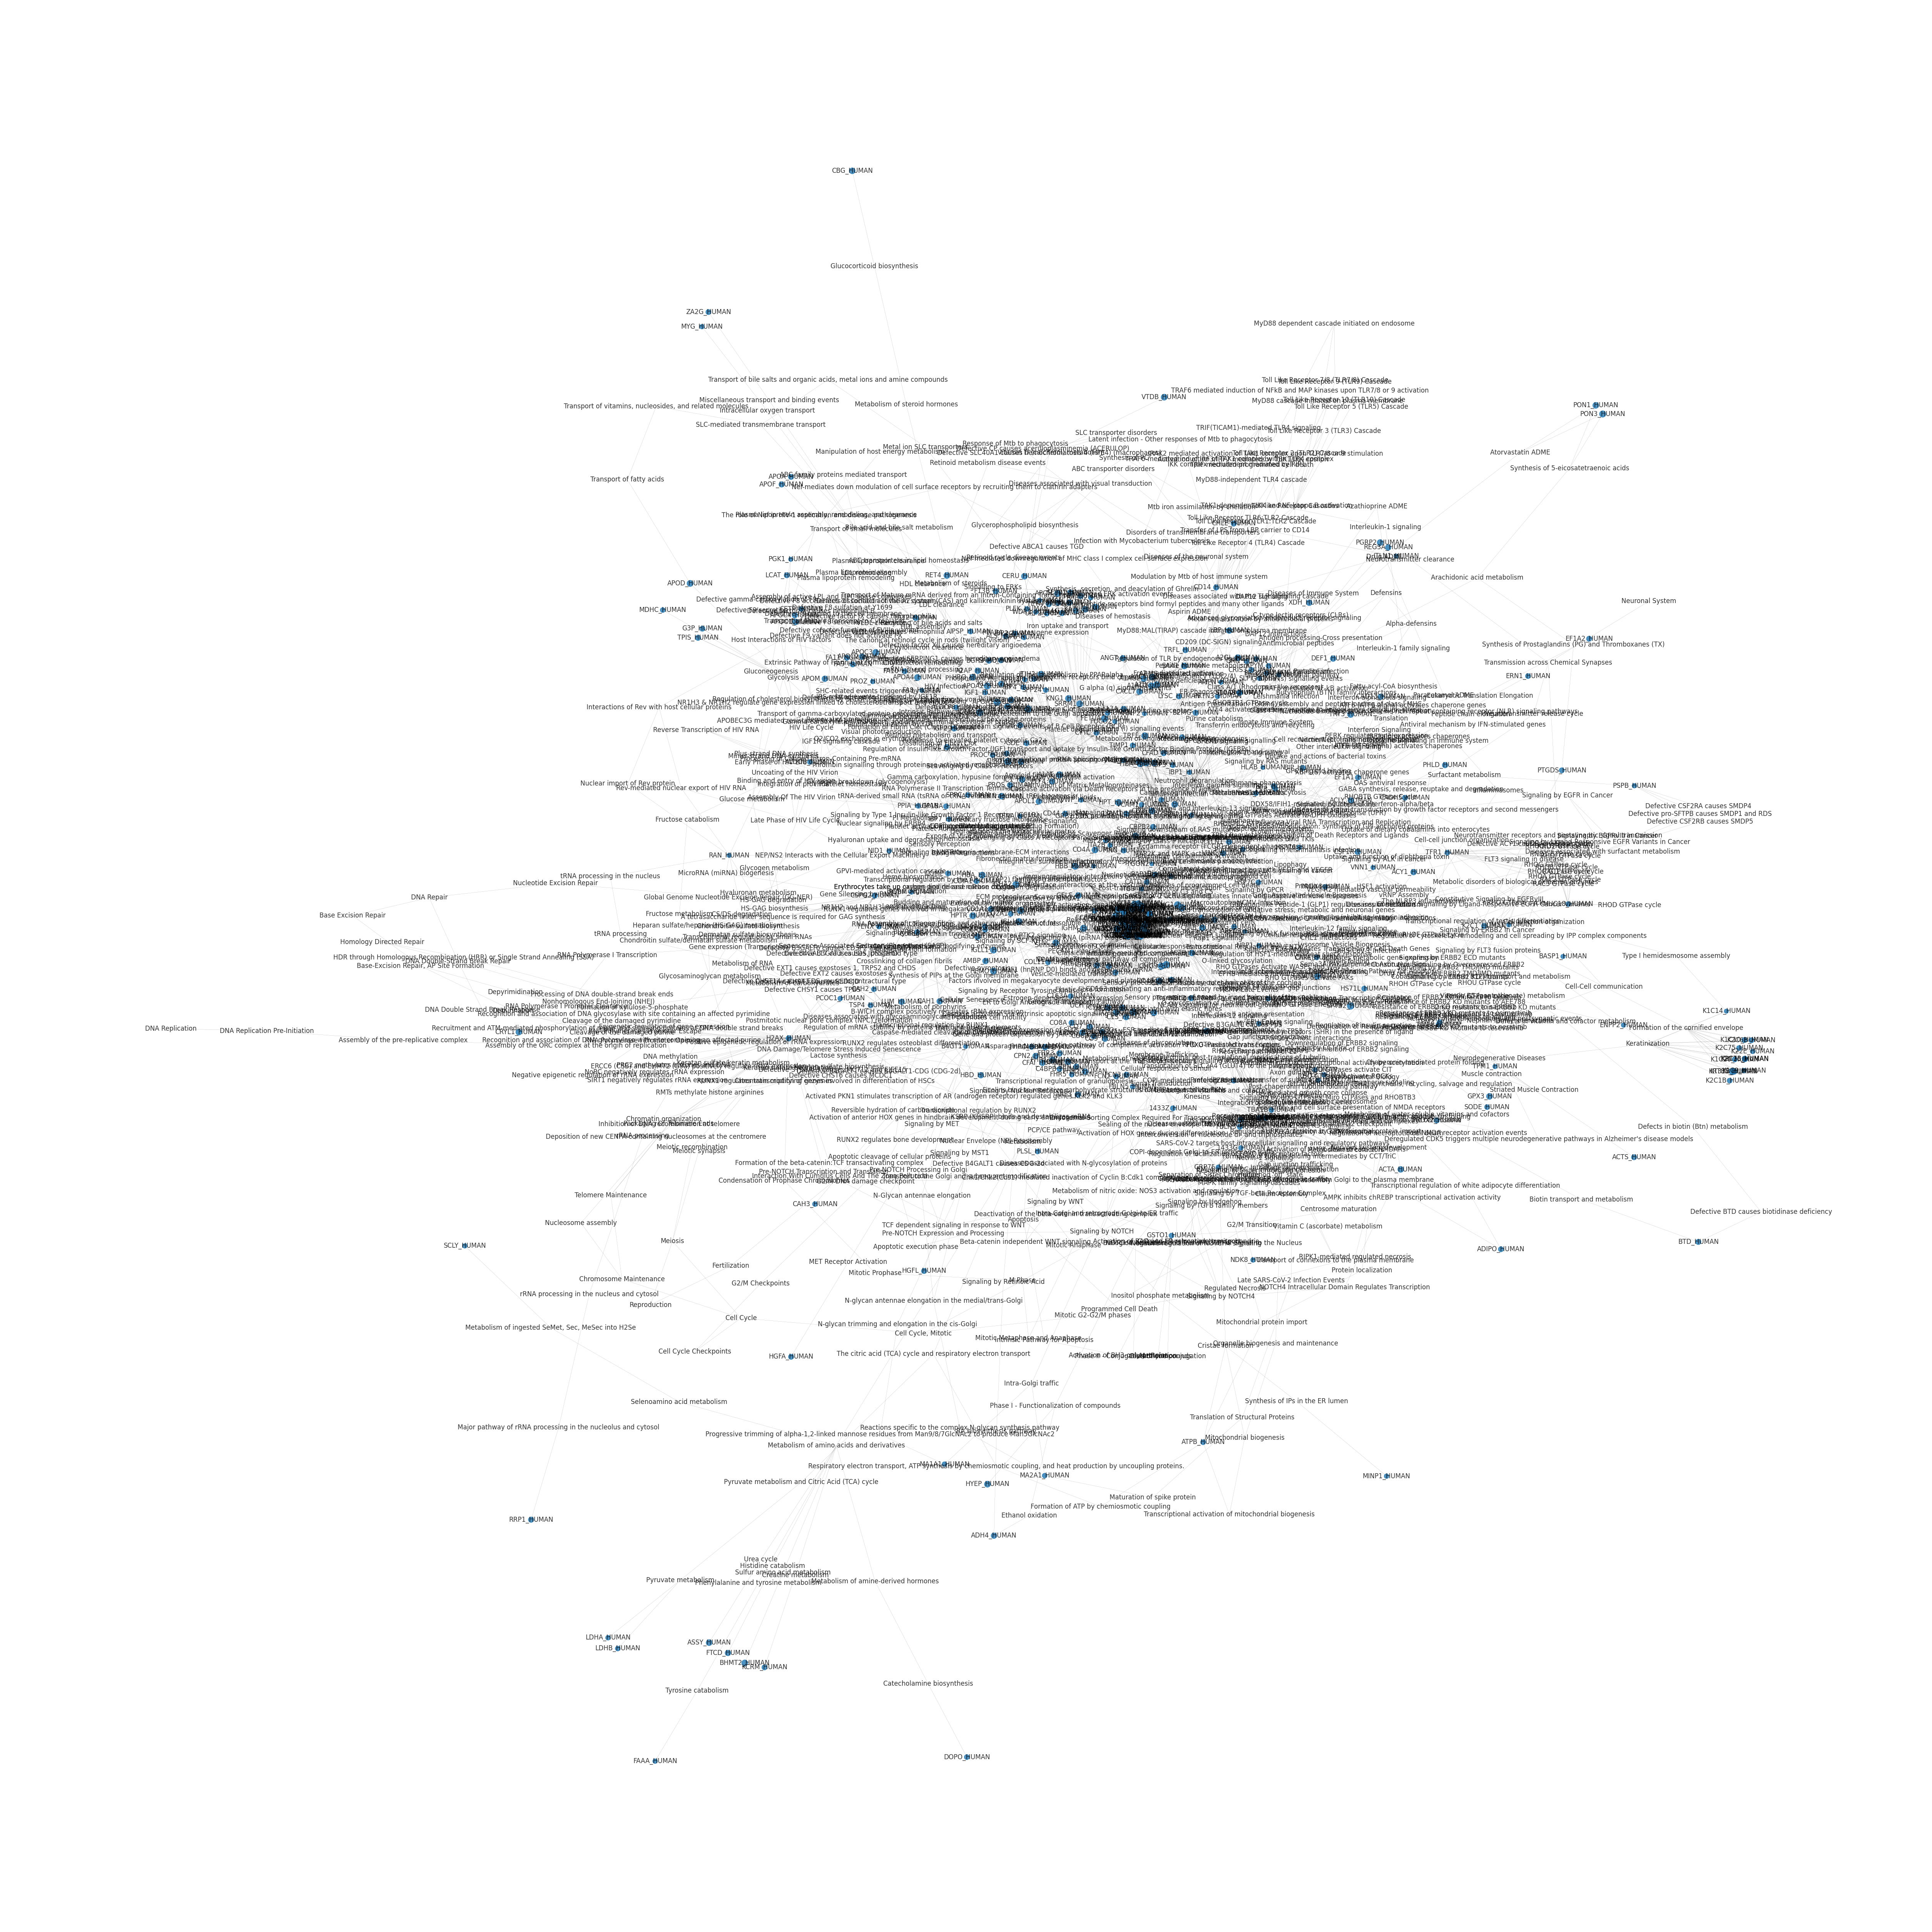

In [6]:
import matplotlib.pyplot as plt

G = graphs[samples[0]]
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(50,50))
node_sizes = []
for node in G.nodes():
    node_sizes.append(((G.nodes[node]['weight'])*5)**2)
nx.draw(G, node_size=node_sizes, alpha=0.8, width=0.1, pos=pos, with_labels=True)


In [7]:

coos = {}
for sample in graphs.keys():
    G = graphs[sample]
    pd_adj = nx.to_pandas_adjacency(G)
    adj = pd_adj.values
    edge_index = (adj > 0).nonzero()
    row, col = edge_index
    coo = np.array(list(zip(row,col))).T
    coos[sample] = coo

In [32]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader


data_list = []
for sample in samples:
    G = graphs[sample]
    coo = coos[sample]
    y = ys[sample]
    x = []
    for node in G.nodes():
        x.append([G.nodes()[node]['weight']])
    data_i = Data(x=torch.tensor(x, dtype=torch.float32), edge_index=torch.tensor(coos[sample], dtype=torch.long), 
                  y=torch.tensor(y, dtype=torch.long), num_nodes=G.number_of_nodes())
    data_list.append(data_i)
    
import random
random.shuffle(data_list)
dataloader = DataLoader(data_list, shuffle=True, batch_size=32)
dataset = data_list

print(dataset[1].x, dataset[1].y, dataset[1].edge_index)

tensor([[2.3852],
        [0.0000],
        [0.0000],
        ...,
        [0.0000],
        [0.0000],
        [0.0000]]) tensor(1) tensor([[   0,    0,    0,  ..., 1304, 1305, 1305],
        [   1,    2,    3,  ..., 1227, 1003, 1247]])


In [25]:
print(graphs['TM_M2012_011'].nodes()['CD14_HUMAN']['weight'])
df = edgelists['TM_M2012_011']
df[df['child'] == 'CD14_HUMAN']['abundance'].values[0]

2.0114271009263507


2.0114271009263507

In [30]:

from torch.nn import Dropout, Linear, ReLU, Sigmoid
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn import BatchNorm1d
from torch_geometric.nn import GCNConv, GATv2Conv, GINConv, Sequential, global_mean_pool, global_add_pool, BatchNorm, global_max_pool

class GCN(torch.nn.Module):
    def __init__(self,  num_classes):
        super(GCN, self).__init__()

        self.num_classes =  num_classes
        # hidden layer node features
        self.hidden1 = 256
        self.hidden2 = 128
        self.hidden3 = 64
        self.model = Sequential(
            "x, edge_index, batch_index", [                
                    (GCNConv(-1, self.hidden1), 
                        "x, edge_index -> x1"),
                    (ReLU(), "x1 -> x1a"),
                    (BatchNorm(self.hidden1), "x1a -> x1b" ),                                     
                    (Dropout(p=0.5), "x1a -> x1d"),                                
                    (GCNConv(self.hidden1, self.hidden1), "x1d, edge_index -> x2"),  
                    (ReLU(), "x2 -> x2a"),     
                    (BatchNorm(self.hidden1), "x2a -> x2b" ),                                      
                    (Dropout(p=0.5), "x2a -> x2d"),                                
                    (GCNConv(self.hidden1, self.hidden1), "x2d, edge_index -> x3"),  
                    (ReLU(), "x3 -> x3a"), 
                    (BatchNorm(self.hidden1), "x3a -> x3b" ),                                          
                    (Dropout(p=0.5), "x3a -> x3d"),                               
                    (GCNConv(self.hidden1, self.hidden1), "x3d, edge_index -> x4"),  
                    (ReLU(), "x4 -> x4a"), 
                    (BatchNorm(self.hidden1), "x4a -> x4b" ),  
                    (Dropout(p=0.5), "x4a -> x4d"),                                
                    (GCNConv(self.hidden1, self.hidden1), "x4d, edge_index -> x5"),  
                    (ReLU(), "x5 -> x5a"),                                         
                    (Dropout(p=0.5), "x5a -> x5d"),                                
                    (global_mean_pool, "x5d, batch_index -> x6"),            
                    (Linear(self.hidden1, self.hidden2), "x6 -> x7"),
                    (Linear(self.hidden2, self.hidden3), "x7 -> x8"),
                    (Linear(self.hidden3, self.num_classes), "x8 -> x_out")
                    ]
            )  
        
    def forward(self, graph_data):
        x, edge_index, batch = graph_data.x, graph_data.edge_index,graph_data.batch
        x_out = self.model(x, edge_index, batch)

        return x_out

model = GCN(num_classes=2)


In [37]:
from torch_geometric.datasets import TUDataset

load_tu = True
if load_tu:
    dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True).shuffle()
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    train_dataset = dataset[:int(len(dataset)*0.8)]
    val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset))]
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

model = GCN(num_classes=6)          

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.CrossEntropyLoss()

scheduler = ReduceLROnPlateau(optimizer, mode='min', patience = 3, verbose=True)

model.forward(dataloader.dataset[0])
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))
losses = []
def train():
    model.train()
    for data in dataloader:  # Iterate in batches over the training dataset.
        out = model.forward(data) 
        loss = criterion(out, data.y)  # Compute the loss.
        losses.append(loss)
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        scheduler.step(loss)

        optimizer.zero_grad()  # Clear gradients.
    return loss
         
def test(loader):
     model.eval()
     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data)  
         pred = out.argmax(dim=1)
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

accuracies = []
for epoch in range(1, 500):
    loss = train()
    acc = test(dataloader)
    accuracies.append(acc)
    if epoch % 1 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')


Number of parameters:  312390
Epoch 00008: reducing learning rate of group 0 to 5.0000e-04.
Epoch 00012: reducing learning rate of group 0 to 5.0000e-05.
Epoch 00016: reducing learning rate of group 0 to 5.0000e-06.
Epoch   1 | Loss: 1.79 | Acc: 16.33%
Epoch 00020: reducing learning rate of group 0 to 5.0000e-07.
Epoch 00024: reducing learning rate of group 0 to 5.0000e-08.
Epoch 00028: reducing learning rate of group 0 to 5.0000e-09.
Epoch   2 | Loss: 1.78 | Acc: 16.33%
Epoch   3 | Loss: 1.79 | Acc: 16.33%
Epoch   4 | Loss: 1.79 | Acc: 16.33%
Epoch   5 | Loss: 1.76 | Acc: 16.33%
Epoch   6 | Loss: 1.76 | Acc: 16.33%
Epoch   7 | Loss: 1.76 | Acc: 16.33%
Epoch   8 | Loss: 1.76 | Acc: 16.33%
Epoch   9 | Loss: 1.80 | Acc: 16.33%
Epoch  10 | Loss: 1.79 | Acc: 16.33%
Epoch  11 | Loss: 1.78 | Acc: 16.33%
Epoch  12 | Loss: 1.80 | Acc: 16.33%


KeyboardInterrupt: 

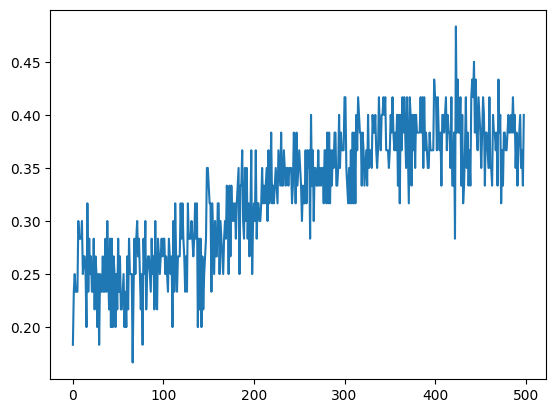

In [ ]:
import matplotlib.pyplot as plt
#plt.plot([l.detach().numpy().tolist() for l in losses])
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')